# CHARISMA: Demonstration of Chada library

In [3]:
from chada import create, Chada

Create a CHADA archive from native Raman file

In [3]:
create(r"C:\Users\barton\Desktop\200218-17.wdf")

Load CHADA archive into Chada object

In [17]:
C = Chada(r"C:\Users\barton\Desktop\chada\200218-17.cha")

Show unprocessed data

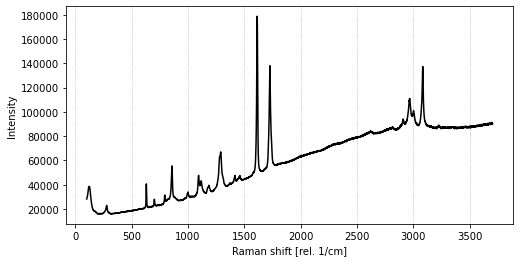

In [18]:
C.plot()

There are commits just as in GIT

In [19]:
C.commits

['Generated CHADA on Fri Mar 19 23:46:55 2021']

Show metadata

In [20]:
C.static_metadata

{'laser wavelength': 514.5011961147924,
 'no. of accumulations': 3,
 'spectral unit': 'Counts',
 'OEM software name': 'WiRE',
 'OEM software version': [5, 2, 0, 9499],
 'Generated on': 'Fri Mar 19 23:46:55 2021',
 'Original file': '200218-17.wdf'}

In [21]:
C.dynamic_metadata

{'Raman data type': 'Single spectrum',
 'xy dimensions': (),
 'no. of channels': 3190,
 'minimum wavelength': 102.76953,
 'maximum wavelength': 3703.711,
 'mean counts': 62918.38,
 'standard deviation': 27122.379}

Now separate a baseline

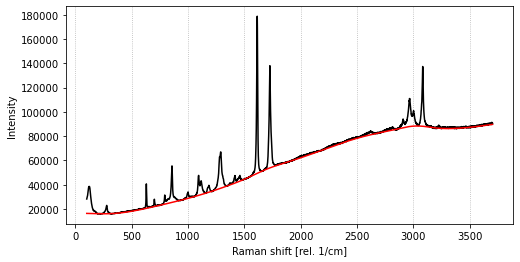

In [22]:
C.baseline(show=True)

The data has been updated

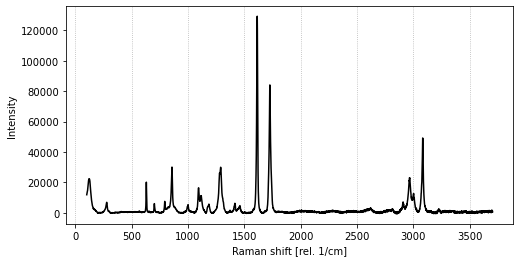

In [23]:
C.plot()

In [24]:
import pandas as pd

The baseline separation appears in the transformers list

In [25]:
pd.Series(C.transformers)

0    [baselineT, [16458.367567535784, 16454.0794616...
dtype: object

The dynamic metadata changes

In [26]:
C.dynamic_metadata

{'Raman data type': 'Single spectrum',
 'xy dimensions': (),
 'no. of channels': 3190,
 'minimum wavelength': 102.76953,
 'maximum wavelength': 3703.711,
 'mean counts': 2823.4126,
 'standard deviation': 8313.479}

Crop spectrum k direction

In [27]:
C.x_crop(500, 2500)

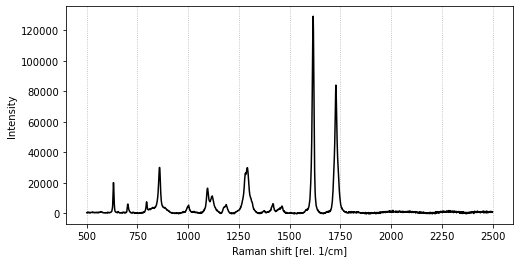

In [28]:
C.plot()

In [29]:
pd.Series(C.transformers)

0    [baselineT, [16458.367567535784, 16454.0794616...
1                                  [x_crop, 500, 2500]
dtype: object

In [30]:
C.dynamic_metadata

{'Raman data type': 'Single spectrum',
 'xy dimensions': (),
 'no. of channels': 1646,
 'minimum wavelength': 499.92188,
 'maximum wavelength': 2499.4395,
 'mean counts': 3315.9292,
 'standard deviation': 10447.238}

Area normalization

In [33]:
C.normalize('area')

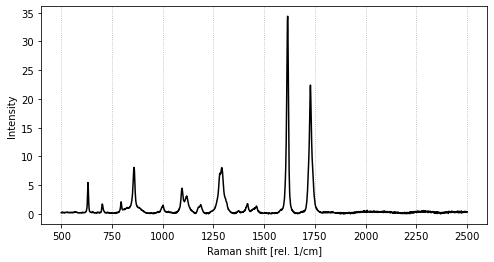

In [34]:
C.plot()

In [37]:
pd.Series(C.transformers)

0    [baselineT, [16458.367567535784, 16454.0794616...
1                                  [x_crop, 500, 2500]
2                                    [normalize, area]
dtype: object

In [38]:
C.dynamic_metadata

{'Raman data type': 'Single spectrum',
 'xy dimensions': (),
 'no. of channels': 1646,
 'minimum wavelength': 499.92188,
 'maximum wavelength': 2499.4395,
 'mean counts': 1.0,
 'standard deviation': 2.7699583}

Peak search - this doesn't change the data

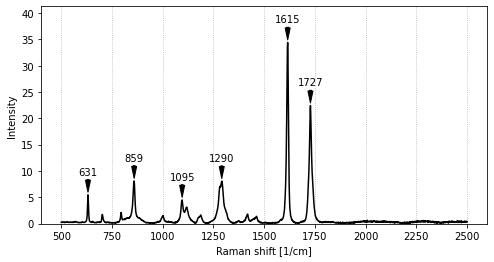

In [39]:
C.peaks(make_plot=True)

The bands list can be extended and exported e.g. to Excel

In [40]:
C.bands

,peak pos [1/cm],peak_heights,prominences,left_bases,right_bases
0,631.638672,0.158525,0.154070,591.667969,754.384766
1,859.189453,0.235069,0.232806,754.384766,1521.193359
2,1095.613281,0.130034,0.129190,952.021484,1226.312500
3,1290.794922,0.234052,0.233474,952.021484,1521.193359
4,1615.630859,1.000000,0.999620,1521.193359,1924.916016
5,1727.773438,0.651566,0.650755,1664.765625,1924.916016


Now we commit. The CHADA file is updated on disk.

In [41]:
C.commit("First round of processing")

C:\Users\barton\.conda\envs\Extended_LBF\lib\zipfile.py:1506: UserWarning: Duplicate name: 'dynamic_meta.txt'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\barton\.conda\envs\Extended_LBF\lib\zipfile.py:1506: UserWarning: Duplicate name: 'transformers.txt'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
C:\Users\barton\.conda\envs\Extended_LBF\lib\zipfile.py:1506: UserWarning: Duplicate name: 'commits.txt'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Kill the current CHADA object

In [42]:
del C

In [43]:
C

NameError: name 'C' is not defined

Make new Chada object from udated CHADA archive

In [44]:
D = Chada(r"C:\Users\barton\Desktop\chada\200218-17.cha")

The data is exactly in the state where we made the commit

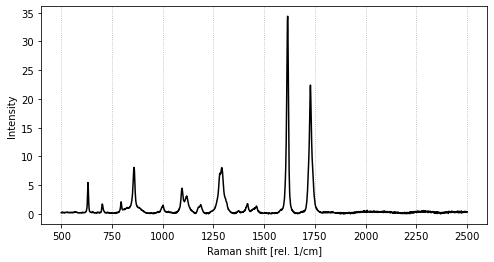

In [45]:
D.plot()

In [46]:
D.commits

['Generated CHADA on Fri Mar 19 23:46:55 2021', 'First round of processing']

In [47]:
pd.Series(D.transformers)

0    [baselineT, [16458.367567535784, 16454.0794616...
1                                  [x_crop, 500, 2500]
2                                    [normalize, area]
dtype: object

All processing steps can be reverted

Let's go one step back

In [48]:
D.rewind(-1)

In [49]:
pd.Series(D.transformers)

0    [baselineT, [16458.367567535784, 16454.0794616...
1                                  [x_crop, 500, 2500]
dtype: object

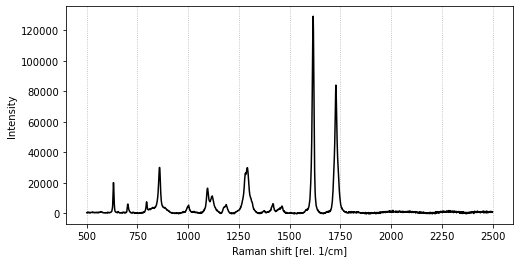

In [50]:
D.plot()

And now all the way to the original data

In [52]:
D.rewind(0)

In [53]:
pd.Series(D.transformers)

C:\Users\barton\.conda\envs\Extended_LBF\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Series([], dtype: float64)

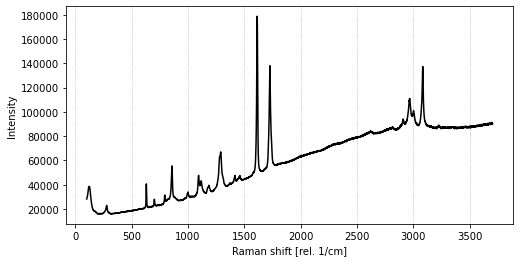

In [54]:
D.plot()

Create a CHADA archive from native Raman file

In [4]:
create(r"\\vm-stor-51\alle\Projekte Kunststoffe\RD\MA\Öffentliche_Projekte\2020-01-07_230007_H2020-CHARISMA_barton\Python\charisma-raman-spectrum-harmonization\test_data\SILICON_x20_1%_02.spc")

gx-y(1)


Load CHADA archive into Chada object

In [5]:
E = Chada(r"C:\Users\barton\Desktop\chada\SILICON_x20_1%_02.cha")

gx-y(1)


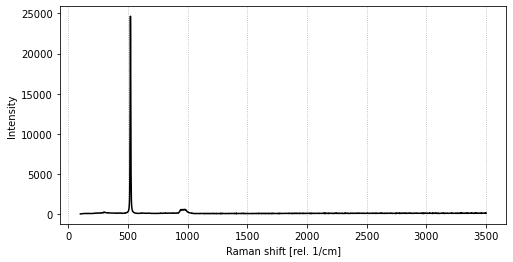

In [6]:
E.plot()

Show metadata

In [8]:
E.static_metadata

{'length': 11751,
 'ftflg': b'\x00',
 'fversn': b'K',
 'fexper': 0,
 'fexp': 128,
 'fnpts': 2578,
 'ffirst': 3501.182373046875,
 'flast': 100.45684051513672,
 'fnsub': 1,
 'fxtype': 13,
 'fytype': 4,
 'fztype': 0,
 'fpost': b'\x00',
 'fdate': 2118914663,
 'fres': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'fsource': b'WiRE2\x00\x00\x00\x00',
 'fpeakpt': 0,
 'fspare': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'fcmnt': "b'A single scan measurement generated by the WiRE2 spectral acquisition wizard.\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'",
 'fcatxt': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'f

In [9]:
E.dynamic_metadata

{'Raman data type': 'Single spectrum',
 'xy dimensions': (),
 'no. of channels': 2578,
 'minimum wavelength': 100.45684051513672,
 'maximum wavelength': 3501.182373046875,
 'mean counts': 163.07017588559927,
 'standard deviation': 899.2160602685575}

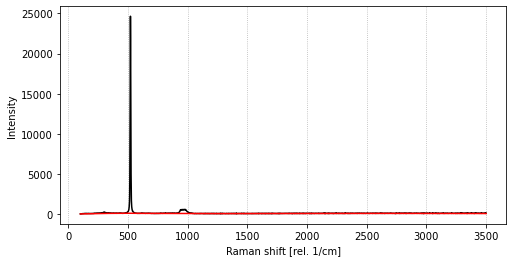

In [10]:
E.baseline(show=True)

Crop spectrum k direction

In [12]:
E.x_crop(200, 1200)

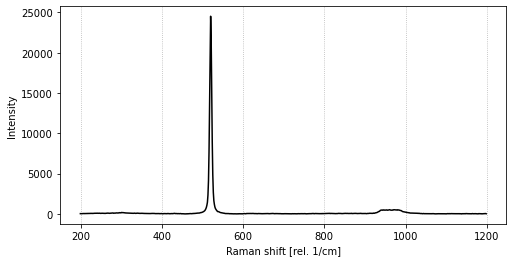

In [15]:
E.plot()

Area normalization

In [16]:
E.normalize('area')

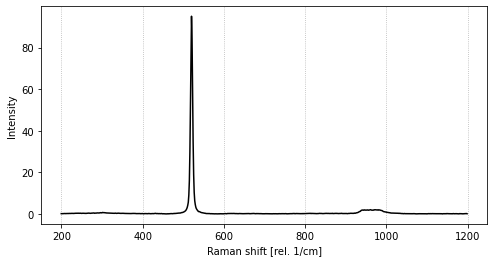

In [17]:
E.plot()

Peak search - this doesn't change the data

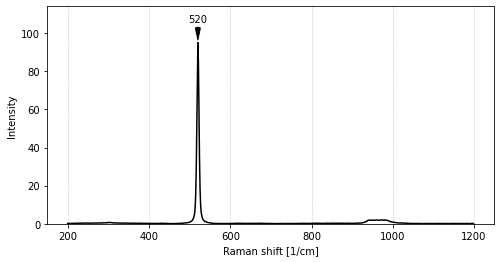

In [19]:
E.peaks(make_plot=True)